Training Random Forest model...

Random Forest Model Evaluation:
Accuracy: 0.9039

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2091
        True       0.74      0.57      0.64       375

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466



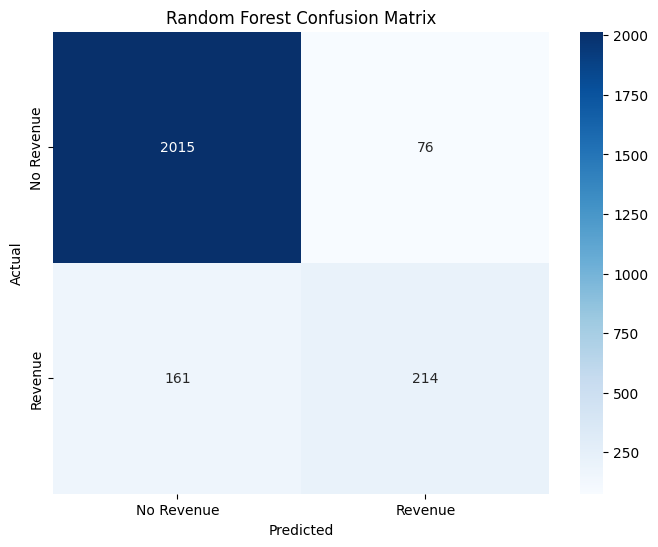


Training XGBoost model...

XGBoost Model Evaluation:
Accuracy: 0.8950

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2091
        True       0.68      0.59      0.63       375

    accuracy                           0.89      2466
   macro avg       0.80      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



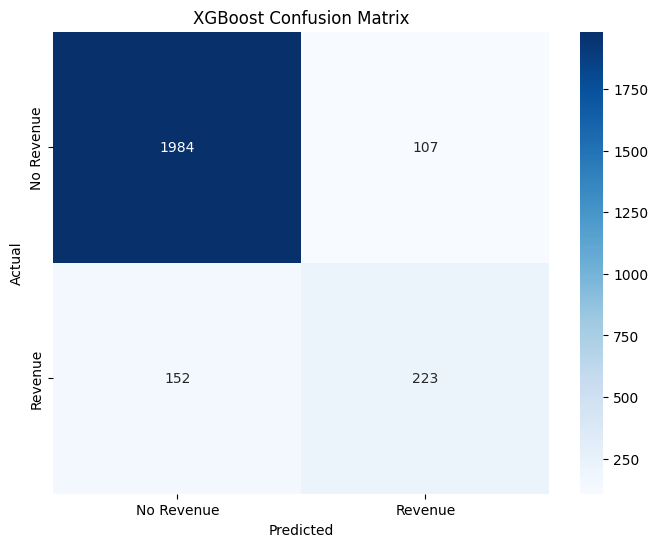

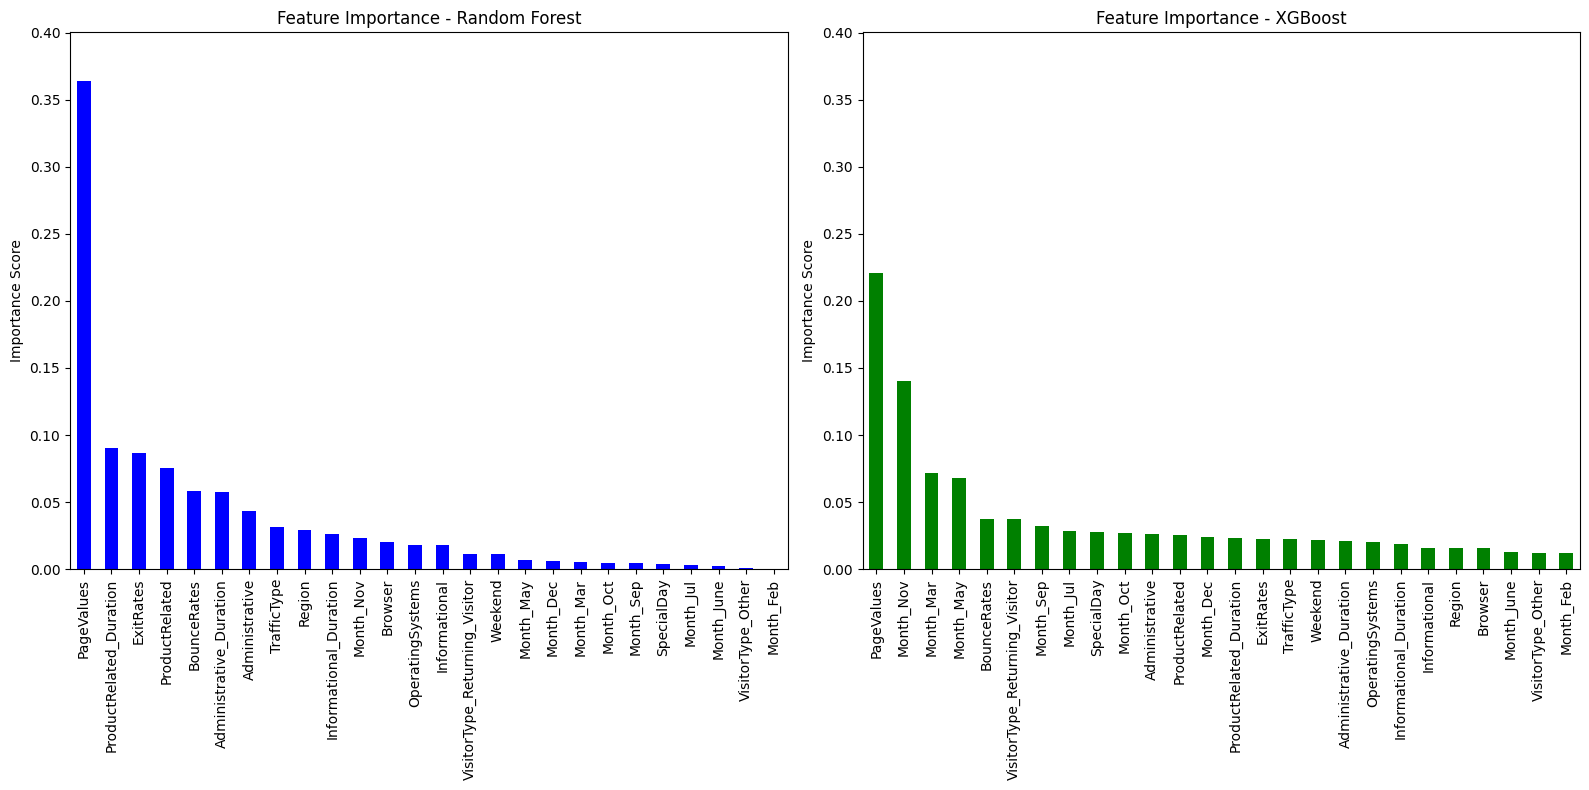

<Figure size 1200x800 with 0 Axes>

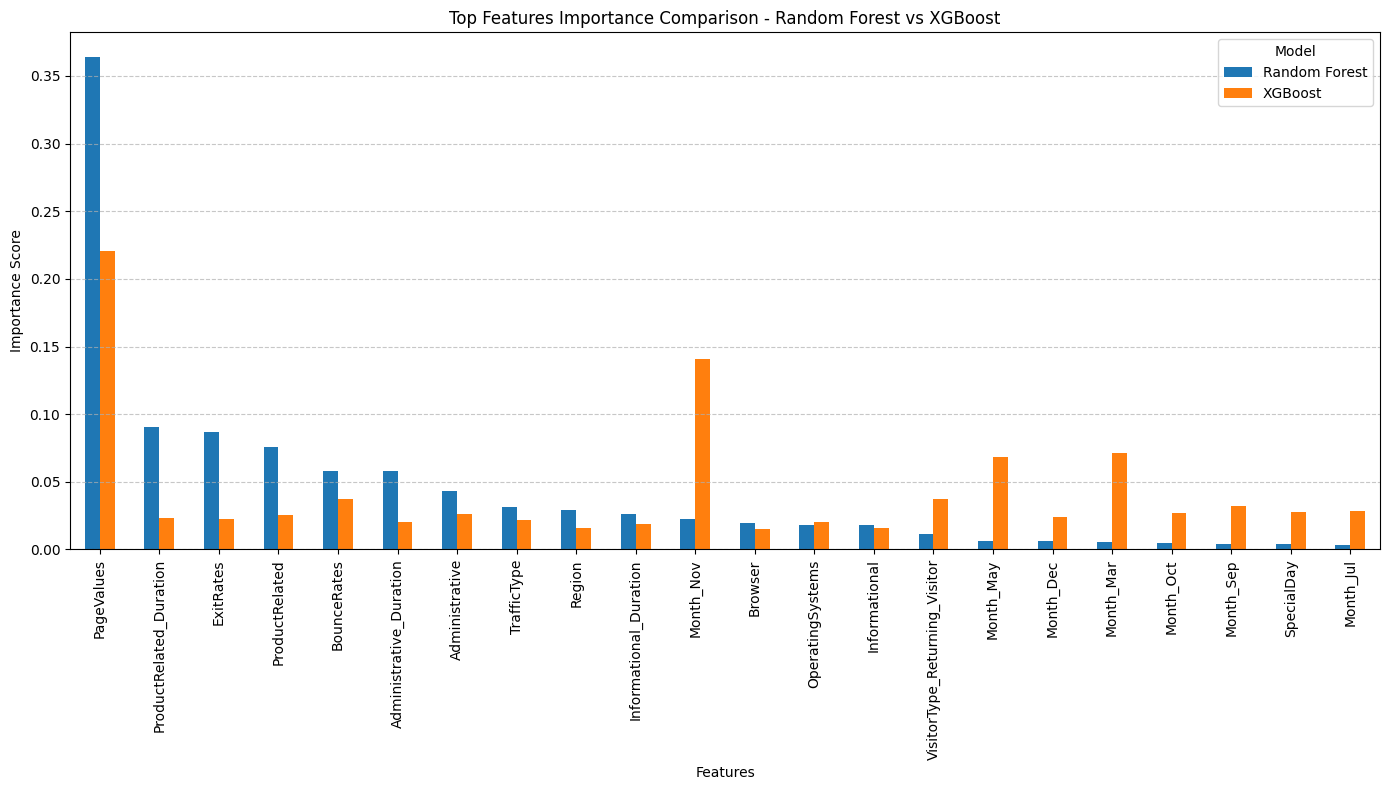

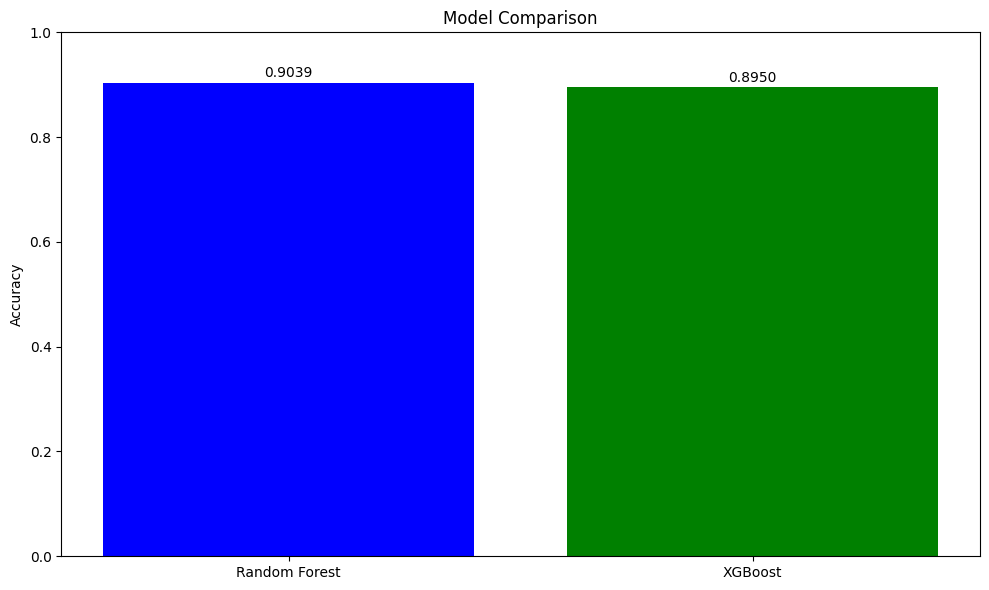

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Data preprocessing
# 1. Handling categorical variables
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# 2. Prepare features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize/Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to dataframe for easier column reference if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Revenue', 'Revenue'],
                yticklabels=['No Revenue', 'Revenue'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

# XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost model
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")

# UPDATED CODE: Plot feature importance for both models with same style and scale
# Get feature importance for both models
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
# For XGBoost, extract feature importance scores
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort both by feature names to ensure consistent ordering
rf_importance_sorted = rf_importance.sort_values(ascending=False)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False)

# Create a DataFrame to hold both sets of importance scores
importance_df = pd.DataFrame({
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
})

# Calculate the maximum importance value to use for setting consistent y-axis scale
max_importance = max(rf_importance.max(), xgb_importance.max()) * 1.1  # Add 10% margin

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot Random Forest feature importance
rf_importance_sorted.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Feature Importance - Random Forest')
ax1.set_ylim(0, max_importance)  # Set the same y-axis limit
ax1.set_ylabel('Importance Score')
ax1.tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Plot XGBoost feature importance
xgb_importance_sorted.plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Feature Importance - XGBoost')
ax2.set_ylim(0, max_importance)  # Set the same y-axis limit
ax2.set_ylabel('Importance Score')
ax2.tick_params(axis='x', rotation=90)  # Rotate x labels for readability

plt.tight_layout()
plt.show()

# Alternative: Top 15 features comparison in a single plot
plt.figure(figsize=(12, 8))

# Get the union of top 15 features from both models
top_rf = set(rf_importance_sorted.index[:15])
top_xgb = set(xgb_importance_sorted.index[:15])
top_features = list(top_rf.union(top_xgb))

# Create a DataFrame with just these features
top_importance_df = importance_df.loc[top_features].sort_values(by='Random Forest', ascending=False)

# Plot as grouped bar chart
top_importance_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top Features Importance Comparison - Random Forest vs XGBoost')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare models
models = ['Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()

Training Random Forest model...

Random Forest Model Evaluation:
Accuracy: 0.9039

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2091
        True       0.74      0.57      0.64       375

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466



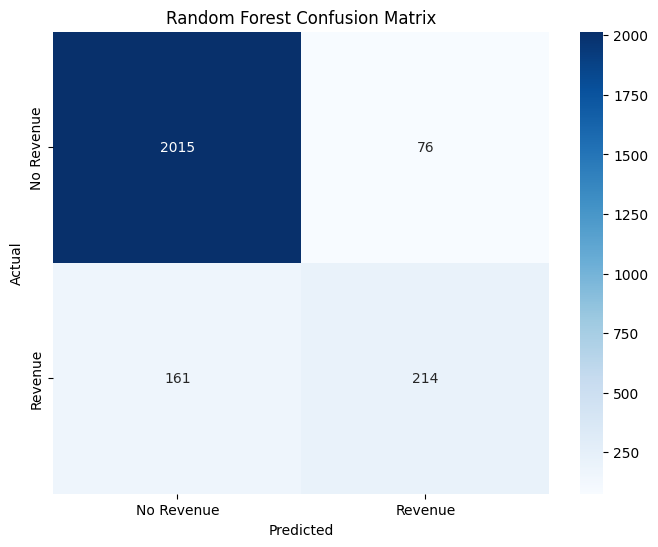


Training XGBoost model...

XGBoost Model Evaluation:
Accuracy: 0.8950

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2091
        True       0.68      0.59      0.63       375

    accuracy                           0.89      2466
   macro avg       0.80      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



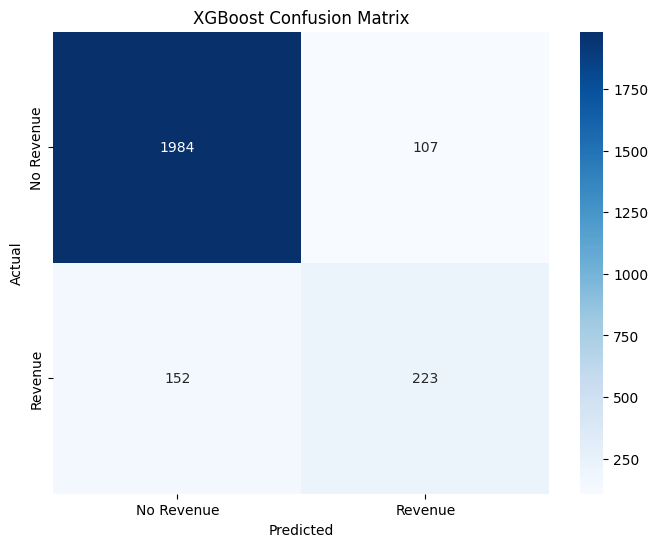

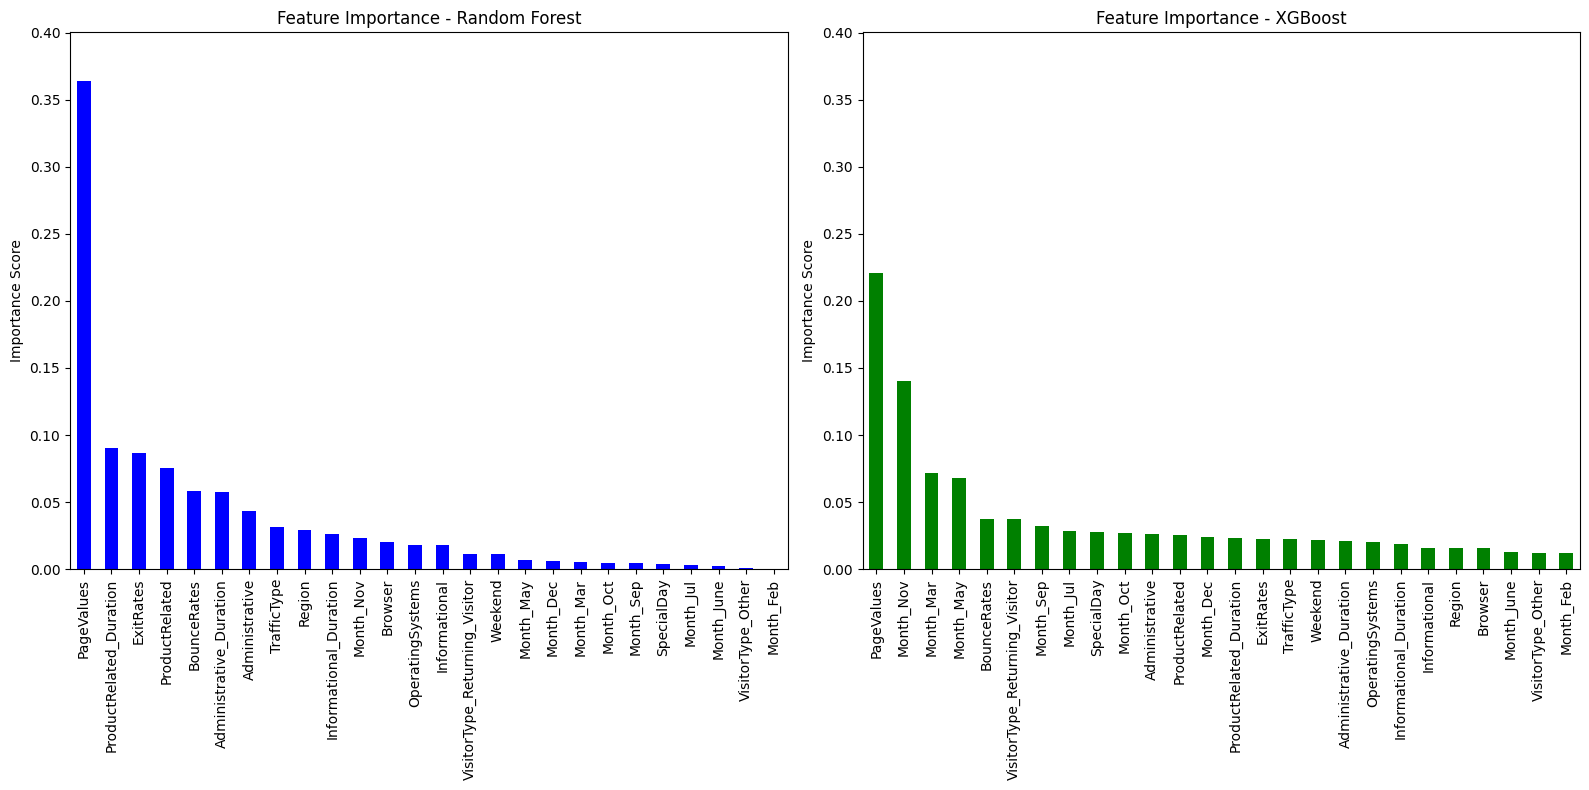

<Figure size 1200x800 with 0 Axes>

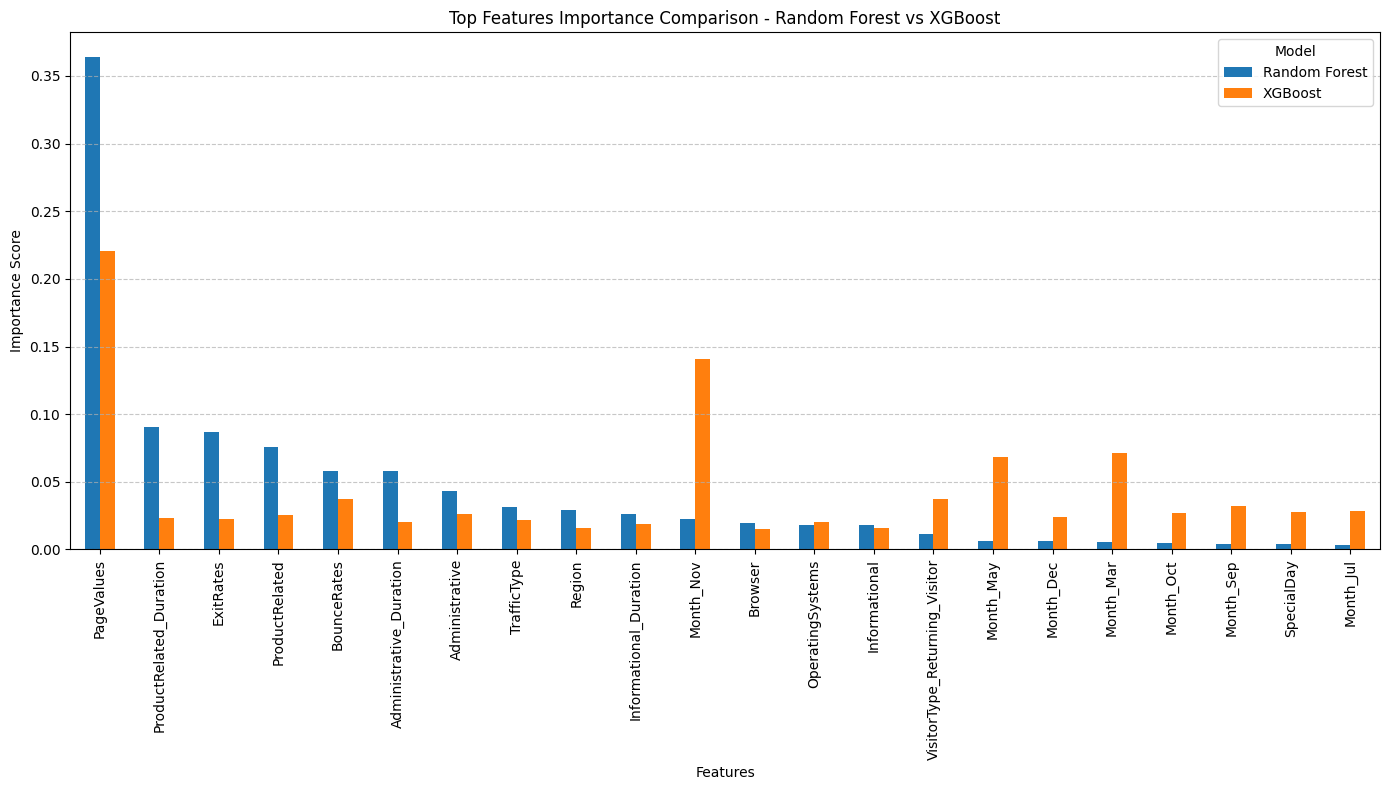

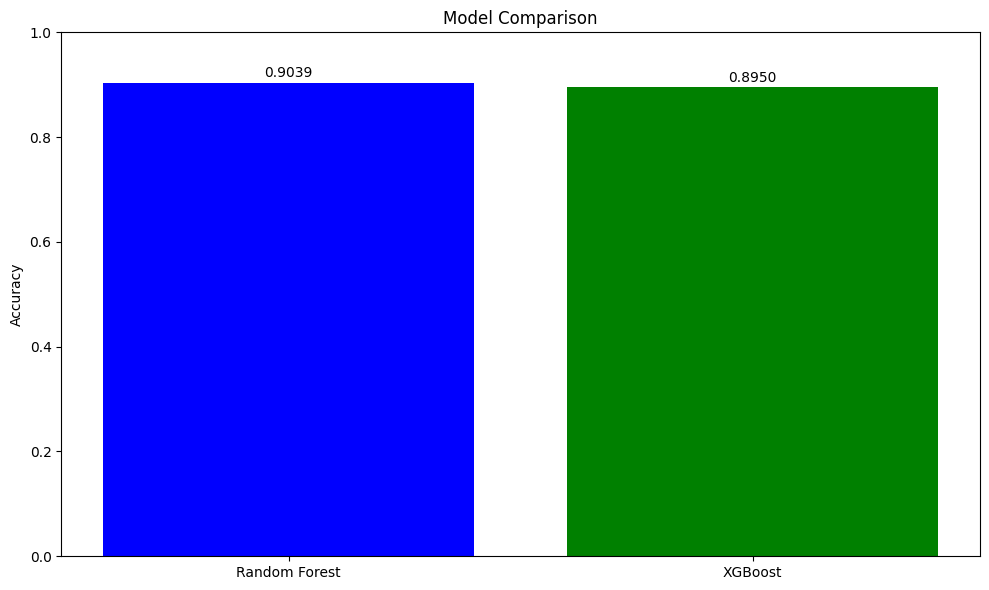


Exporting models to .pkl files...
Random Forest model saved as 'random_forest_model.pkl'
XGBoost model saved as 'xgboost_model.pkl'
Scaler saved as 'scaler.pkl'

Model export complete. To load these models in the future, use:
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_xgb_model = joblib.load('xgboost_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb
from sklearn.pipeline import Pipeline
import joblib  # Added for model export

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Data preprocessing
# 1. Handling categorical variables
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# 2. Prepare features (X) and target (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize/Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to dataframe for easier column reference if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Revenue', 'Revenue'],
                yticklabels=['No Revenue', 'Revenue'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

# XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost model
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_pred, "XGBoost Confusion Matrix")

# UPDATED CODE: Plot feature importance for both models with same style and scale
# Get feature importance for both models
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
# For XGBoost, extract feature importance scores
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)

# Sort both by feature names to ensure consistent ordering
rf_importance_sorted = rf_importance.sort_values(ascending=False)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False)

# Create a DataFrame to hold both sets of importance scores
importance_df = pd.DataFrame({
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance
})

# Calculate the maximum importance value to use for setting consistent y-axis scale
max_importance = max(rf_importance.max(), xgb_importance.max()) * 1.1  # Add 10% margin

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot Random Forest feature importance
rf_importance_sorted.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Feature Importance - Random Forest')
ax1.set_ylim(0, max_importance)  # Set the same y-axis limit
ax1.set_ylabel('Importance Score')
ax1.tick_params(axis='x', rotation=90)  # Rotate x labels for readability

# Plot XGBoost feature importance
xgb_importance_sorted.plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Feature Importance - XGBoost')
ax2.set_ylim(0, max_importance)  # Set the same y-axis limit
ax2.set_ylabel('Importance Score')
ax2.tick_params(axis='x', rotation=90)  # Rotate x labels for readability

plt.tight_layout()
plt.show()

# Alternative: Top 15 features comparison in a single plot
plt.figure(figsize=(12, 8))

# Get the union of top 15 features from both models
top_rf = set(rf_importance_sorted.index[:15])
top_xgb = set(xgb_importance_sorted.index[:15])
top_features = list(top_rf.union(top_xgb))

# Create a DataFrame with just these features
top_importance_df = importance_df.loc[top_features].sort_values(by='Random Forest', ascending=False)

# Plot as grouped bar chart
top_importance_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top Features Importance Comparison - Random Forest vs XGBoost')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compare models
models = ['Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, xgb_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()

# ADDED CODE: Export both models to .pkl files
print("\nExporting models to .pkl files...")

# Export Random Forest model
rf_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, rf_filename)
print(f"Random Forest model saved as '{rf_filename}'")

# Export XGBoost model
xgb_filename = 'xgboost_model.pkl'
joblib.dump(xgb_model, xgb_filename)
print(f"XGBoost model saved as '{xgb_filename}'")

# Export the scaler as well to ensure consistent preprocessing for future predictions
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as '{scaler_filename}'")

print("\nModel export complete. To load these models in the future, use:")
print("loaded_rf_model = joblib.load('random_forest_model.pkl')")
print("loaded_xgb_model = joblib.load('xgboost_model.pkl')")
print("loaded_scaler = joblib.load('scaler.pkl')")